In [693]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Preprocessing

In [694]:
df = pd.read_csv('/content/appendicities.csv')
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,NaN,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,NaN,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,NaN,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,NaN,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [695]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         428 non-null    float64
 1   BMI                         430 non-null    float64
 2   Sex                         430 non-null    object 
 3   Height                      430 non-null    float64
 4   Weight                      430 non-null    float64
 5   AlvaradoScore               430 non-null    int64  
 6   PediatricAppendicitisScore  430 non-null    int64  
 7   AppendixOnSono              428 non-null    object 
 8   AppendixDiameter            266 non-null    float64
 9   MigratoryPain               430 non-null    object 
 10  LowerAbdominalPainRight     429 non-null    object 
 11  ReboundTenderness           427 non-null    object 
 12  CoughingPain                429 non-null    object 
 13  PsoasSign                   393 non

In [696]:
df.head(35)


,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.5,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.0,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.0,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.5,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
5,7.400411,15.200000,male,123.0,23.0,9,7,yes,7.0,yes,...,no,no,no,no,no,yes,no,appendicitis,conservative,no
6,13.215606,23.597004,female,171.0,69.0,3,3,yes,6.2,yes,...,no,no,NaN,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
7,13.106092,22.070312,female,160.0,56.5,3,2,no,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
8,11.436003,17.941817,male,153.0,42.0,6,6,yes,10.2,yes,...,no,no,no,no,no,yes,NaN,appendicitis,conservative,no
9,15.123888,23.602255,female,160.5,60.8,8,6,yes,7.3,yes,...,yes,yes,no,no,no,no,no,appendicitis,conservative,no


In [697]:
df.shape

(430, 41)

In [698]:
print(f"Number of columns: {len(df.columns)}")

Number of columns: 41


In [699]:
#Checking any null value there or not
print(df.isnull().sum())

Age                             2
BMI                             0
Sex                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixOnSono                  2
AppendixDiameter              164
MigratoryPain                   0
LowerAbdominalPainRight         1
ReboundTenderness               3
CoughingPain                    1
PsoasSign                      37
Nausea                          0
AppetiteLoss                    1
BodyTemp                        1
WBCCount                        4
NeutrophilPerc                 45
KetonesInUrine                123
ErythrocytesInUrine           123
WBCInUrine                    123
CRPEntry                        6
Dysuria                        19
Stool                           6
Peritonitis                     0
FreeFluids                     17
AppendixWallLayers            288
Kokarde                       280
TissuePerfusio

In [700]:
for column in df.columns:
    print(column)

Age
BMI
Sex
Height
Weight
AlvaradoScore
PediatricAppendicitisScore
AppendixOnSono
AppendixDiameter
MigratoryPain
LowerAbdominalPainRight
ReboundTenderness
CoughingPain
PsoasSign
Nausea
AppetiteLoss
BodyTemp
WBCCount
NeutrophilPerc
KetonesInUrine
ErythrocytesInUrine
WBCInUrine
CRPEntry
Dysuria
Stool
Peritonitis
FreeFluids
AppendixWallLayers
Kokarde
TissuePerfusion
SurroundingTissueReaction
PathLymphNodes
MesentricLymphadenitis
BowelWallThick
Ileus
FecalImpaction
Meteorism
Enteritis
DiagnosisByCriteria
TreatmentGroupBinar
AppendicitisComplications


There are 41 features.

In [701]:
#Impute missing values with the mean
df.fillna(df.mean(), inplace=True)

<ipython-input-701-f96b28a1c441>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [702]:
print(df.isnull().sum())

Age                             0
BMI                             0
Sex                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixOnSono                  2
AppendixDiameter                0
MigratoryPain                   0
LowerAbdominalPainRight         1
ReboundTenderness               3
CoughingPain                    1
PsoasSign                      37
Nausea                          0
AppetiteLoss                    1
BodyTemp                        0
WBCCount                        0
NeutrophilPerc                  0
KetonesInUrine                123
ErythrocytesInUrine           123
WBCInUrine                    123
CRPEntry                        0
Dysuria                        19
Stool                           6
Peritonitis                     0
FreeFluids                     17
AppendixWallLayers            288
Kokarde                       280
TissuePerfusio

In [703]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,5.500000,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,female,152.0,29.1,8,8,yes,7.713158,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,male,133.5,28.5,3,3,yes,6.000000,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,male,146.0,34.5,4,3,yes,6.000000,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,female,164.0,55.0,2,2,yes,6.500000,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,male,166.5,61.8,5,4,no,7.713158,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,male,152.3,68.0,7,7,no,7.713158,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,male,160.0,74.0,5,6,no,7.713158,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,female,120.5,32.0,5,3,no,7.713158,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [704]:
df['Sex'].replace('male',1,inplace=True)
df['Sex'].replace('female',0,inplace=True)

In [705]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,yes,5.500000,no,...,yes,yes,yes,no,yes,no,no,noAppendicitis,conservative,no
1,12.410678,12.595222,0,152.0,29.1,8,8,yes,7.713158,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,no
2,10.537988,15.991247,1,133.5,28.5,3,3,yes,6.000000,no,...,no,NaN,no,no,NaN,NaN,no,noAppendicitis,conservative,no
3,10.425736,16.185025,1,146.0,34.5,4,3,yes,6.000000,no,...,no,NaN,no,no,no,no,no,appendicitis,conservative,no
4,13.270363,20.449137,0,164.0,55.0,2,2,yes,6.500000,no,...,no,no,no,no,no,yes,no,noAppendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,no,7.713158,no,...,yes,yes,no,NaN,NaN,NaN,NaN,noAppendicitis,conservative,no
426,12.528405,29.316297,1,152.3,68.0,7,7,no,7.713158,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,noAppendicitis,conservative,no
427,12.013689,28.906250,1,160.0,74.0,5,6,no,7.713158,yes,...,no,no,NaN,NaN,NaN,yes,NaN,noAppendicitis,conservative,no
428,7.739904,22.038188,0,120.5,32.0,5,3,no,7.713158,no,...,yes,yes,NaN,no,NaN,yes,yes,noAppendicitis,conservative,no


In [706]:
df['AppendixOnSono'].replace('yes',1,inplace=True)
df['AppendixOnSono'].replace('no',0,inplace=True)

In [707]:
df['AppendixOnSono'].fillna(df['AppendixOnSono'].mean(), inplace=True)


In [708]:
# Replace 'yes' with 0 and 'no' with 1 in multiple columns
for col in df:
    df[col].replace(to_replace=['yes','no'], value=[0,1], inplace=True)

In [709]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,noAppendicitis,conservative,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,appendicitis,surgical,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.0,NaN,1.0,1.0,NaN,NaN,1.0,noAppendicitis,conservative,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,appendicitis,conservative,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,noAppendicitis,conservative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,noAppendicitis,conservative,1
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,noAppendicitis,conservative,1
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,...,1.0,1.0,NaN,NaN,NaN,0.0,NaN,noAppendicitis,conservative,1
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,...,0.0,0.0,NaN,1.0,NaN,0.0,0.0,noAppendicitis,conservative,1


In [710]:
# Fill all null values in the dataset with the mean
df.fillna(df.mean(), inplace=True)

<ipython-input-710-de276ebc4da7>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [711]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,noAppendicitis,conservative,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,appendicitis,surgical,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,noAppendicitis,conservative,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,appendicitis,conservative,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,noAppendicitis,conservative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,...,0.000000,0.000000,1.000000,0.855072,0.621622,0.271028,0.536585,noAppendicitis,conservative,1
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,...,0.315152,0.195652,0.590909,0.855072,0.000000,0.271028,0.536585,noAppendicitis,conservative,1
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.000000,0.536585,noAppendicitis,conservative,1
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,...,0.000000,0.000000,0.590909,1.000000,0.621622,0.000000,0.000000,noAppendicitis,conservative,1


In [712]:
df['DiagnosisByCriteria'].replace('noAppendicitis',1,inplace=True)
df['DiagnosisByCriteria'].replace('appendicitis',0,inplace=True)

In [713]:
df.head(50)

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,conservative,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,surgical,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,conservative,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,conservative,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,conservative,1
5,7.400411,15.200000,1,123.0,23.0,9,7,1.0,7.000000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0,conservative,1
6,13.215606,23.597004,0,171.0,69.0,3,3,1.0,6.200000,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.271028,0.536585,1,conservative,1
7,13.106092,22.070312,0,160.0,56.5,3,2,0.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,surgical,1
8,11.436003,17.941817,1,153.0,42.0,6,6,1.0,10.200000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.536585,0,conservative,1
9,15.123888,23.602255,0,160.5,60.8,8,6,1.0,7.300000,0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,conservative,1


In [714]:
df['TreatmentGroupBinar'].replace('conservative',1,inplace=True)
df['TreatmentGroupBinar'].replace('surgical',0,inplace=True)

In [715]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,1,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,1,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,...,0.000000,0.000000,1.000000,0.855072,0.621622,0.271028,0.536585,1,1,1
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,...,0.315152,0.195652,0.590909,0.855072,0.000000,0.271028,0.536585,1,1,1
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.000000,0.536585,1,1,1
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,...,0.000000,0.000000,0.590909,1.000000,0.621622,0.000000,0.000000,1,1,1


In [716]:
df = df.drop('TissuePerfusion', axis=1)

In [717]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,1,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,1,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,...,0.000000,0.000000,1.000000,0.855072,0.621622,0.271028,0.536585,1,1,1
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,...,0.315152,0.195652,0.590909,0.855072,0.000000,0.271028,0.536585,1,1,1
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.000000,0.536585,1,1,1
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,...,0.000000,0.000000,0.590909,1.000000,0.621622,0.000000,0.000000,1,1,1


In [718]:
#Checking any null value there or not
print(df.isnull().sum())

Age                             0
BMI                             0
Sex                             0
Height                          0
Weight                          0
AlvaradoScore                   0
PediatricAppendicitisScore      0
AppendixOnSono                  0
AppendixDiameter                0
MigratoryPain                   0
LowerAbdominalPainRight         0
ReboundTenderness               0
CoughingPain                    0
PsoasSign                      37
Nausea                          0
AppetiteLoss                    0
BodyTemp                        0
WBCCount                        0
NeutrophilPerc                  0
KetonesInUrine                123
ErythrocytesInUrine           123
WBCInUrine                    123
CRPEntry                        0
Dysuria                         0
Stool                           6
Peritonitis                     0
FreeFluids                      0
AppendixWallLayers            288
Kokarde                         0
SurroundingTis

In [719]:
df = df.drop('PsoasSign', axis=1)
df = df.drop('KetonesInUrine', axis=1)
df = df.drop('ErythrocytesInUrine', axis=1)
df = df.drop('WBCInUrine', axis=1)
df = df.drop('AppendixWallLayers', axis=1)


In [720]:
print(df.isnull().sum())

Age                           0
BMI                           0
Sex                           0
Height                        0
Weight                        0
AlvaradoScore                 0
PediatricAppendicitisScore    0
AppendixOnSono                0
AppendixDiameter              0
MigratoryPain                 0
LowerAbdominalPainRight       0
ReboundTenderness             0
CoughingPain                  0
Nausea                        0
AppetiteLoss                  0
BodyTemp                      0
WBCCount                      0
NeutrophilPerc                0
CRPEntry                      0
Dysuria                       0
Stool                         6
Peritonitis                   0
FreeFluids                    0
Kokarde                       0
SurroundingTissueReaction     0
PathLymphNodes                0
MesentricLymphadenitis        0
BowelWallThick                0
Ileus                         0
FecalImpaction                0
Meteorism                     0
Enteriti

In [721]:
df.head(60)

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,1,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,1,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,1,1
5,7.400411,15.200000,1,123.0,23.0,9,7,1.0,7.000000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0,1,1
6,13.215606,23.597004,0,171.0,69.0,3,3,1.0,6.200000,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.271028,0.536585,1,1,1
7,13.106092,22.070312,0,160.0,56.5,3,2,0.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
8,11.436003,17.941817,1,153.0,42.0,6,6,1.0,10.200000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.536585,0,1,1
9,15.123888,23.602255,0,160.5,60.8,8,6,1.0,7.300000,0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1


In [722]:
print(f"Number of columns: {len(df.columns)}")

Number of columns: 35


In [723]:
df = df.applymap(lambda x: x if not isinstance(x, str) else np.NaN)

In [724]:
print(f"Number of columns: {len(df.columns)}")

Number of columns: 35


In [725]:
df.head(60)

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,1,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,1,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,1,1
5,7.400411,15.200000,1,123.0,23.0,9,7,1.0,7.000000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0,1,1
6,13.215606,23.597004,0,171.0,69.0,3,3,1.0,6.200000,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.271028,0.536585,1,1,1
7,13.106092,22.070312,0,160.0,56.5,3,2,0.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
8,11.436003,17.941817,1,153.0,42.0,6,6,1.0,10.200000,0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.536585,0,1,1
9,15.123888,23.602255,0,160.5,60.8,8,6,1.0,7.300000,0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1


#Dataset Characteristics and Exploratory Data Analysis (EDA):

In [726]:
df.describe()

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,11.368983,18.976406,0.537209,148.420930,43.632174,5.723256,4.953488,0.644860,7.713158,0.744186,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0.427907,0.616279,0.881395
std,3.413590,4.295955,0.499194,19.956526,17.038258,2.142949,1.986592,0.477998,2.023754,0.436826,...,0.288118,0.224996,0.222681,0.141180,0.201425,0.221986,0.154159,0.495352,0.486858,0.323699
min,0.035592,7.827983,0.000000,47.500000,3.275000,2.000000,1.000000,0.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.349076,15.845389,0.000000,138.000000,31.125000,4.000000,4.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.590909,0.855072,0.621622,0.271028,0.536585,0.000000,0.000000,1.000000
50%,11.509925,18.143691,1.000000,150.500000,42.000000,6.000000,5.000000,1.000000,7.713158,1.000000,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0.000000,1.000000,1.000000
75%,13.913073,21.244624,1.000000,162.875000,55.000000,7.000000,6.000000,1.000000,8.000000,1.000000,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,1.000000,1.000000,1.000000
max,17.872690,38.156221,1.000000,190.000000,98.000000,10.000000,10.000000,1.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


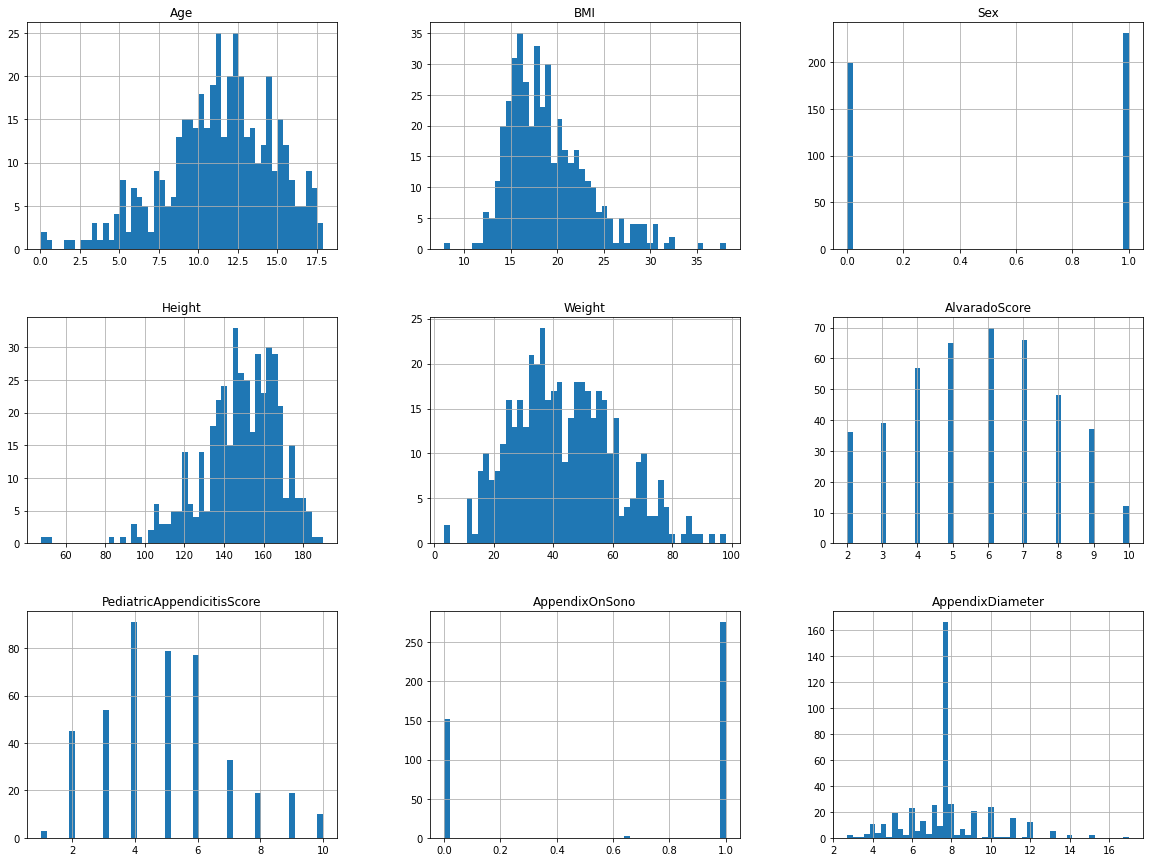

In [727]:
columns = ['Age', 'BMI', 'Sex','Height','Weight','AlvaradoScore','PediatricAppendicitisScore','AppendixOnSono','AppendixDiameter']
df[columns].hist(bins=50, figsize=(20,15))
plt.show()

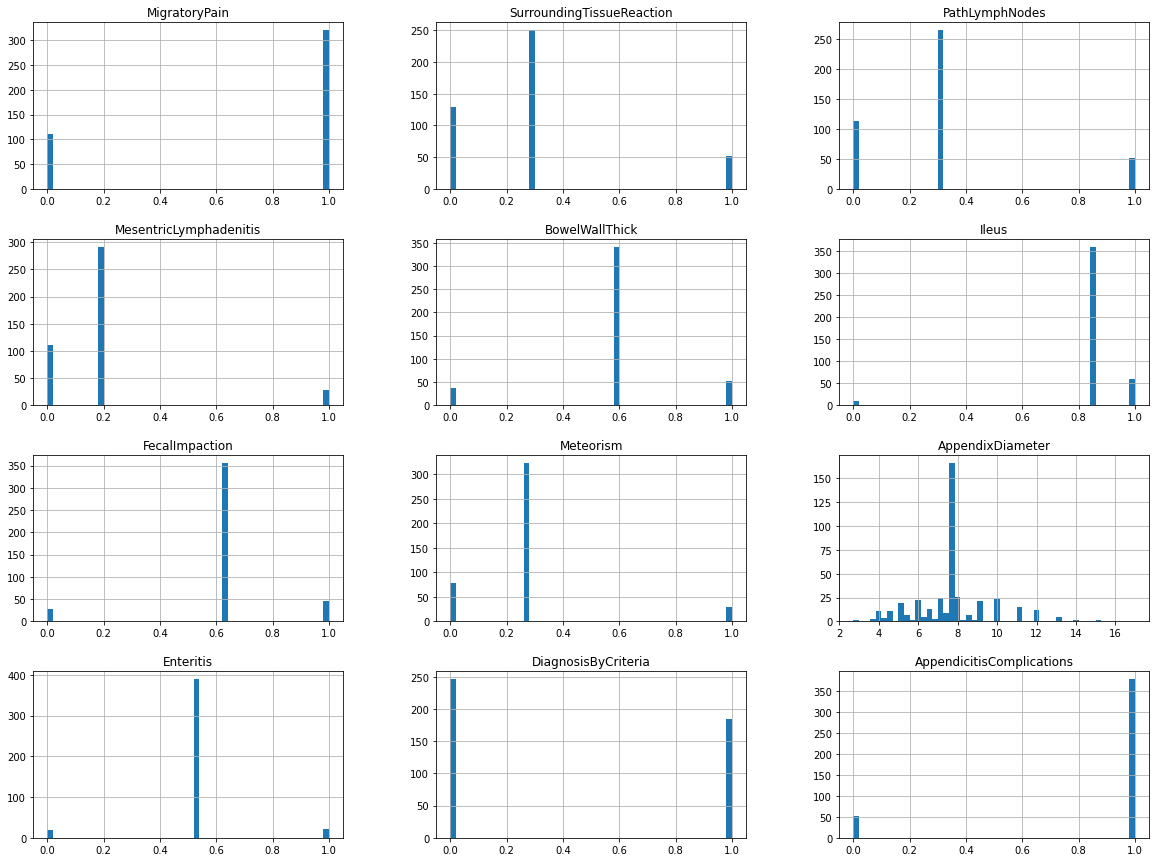

In [728]:
columns = ['MigratoryPain', 'SurroundingTissueReaction', 'PathLymphNodes','MesentricLymphadenitis','BowelWallThick','Ileus','FecalImpaction','Meteorism','AppendixDiameter','Enteritis','DiagnosisByCriteria','AppendicitisComplications']
df[columns].hist(bins=50, figsize=(20,15))
plt.show()

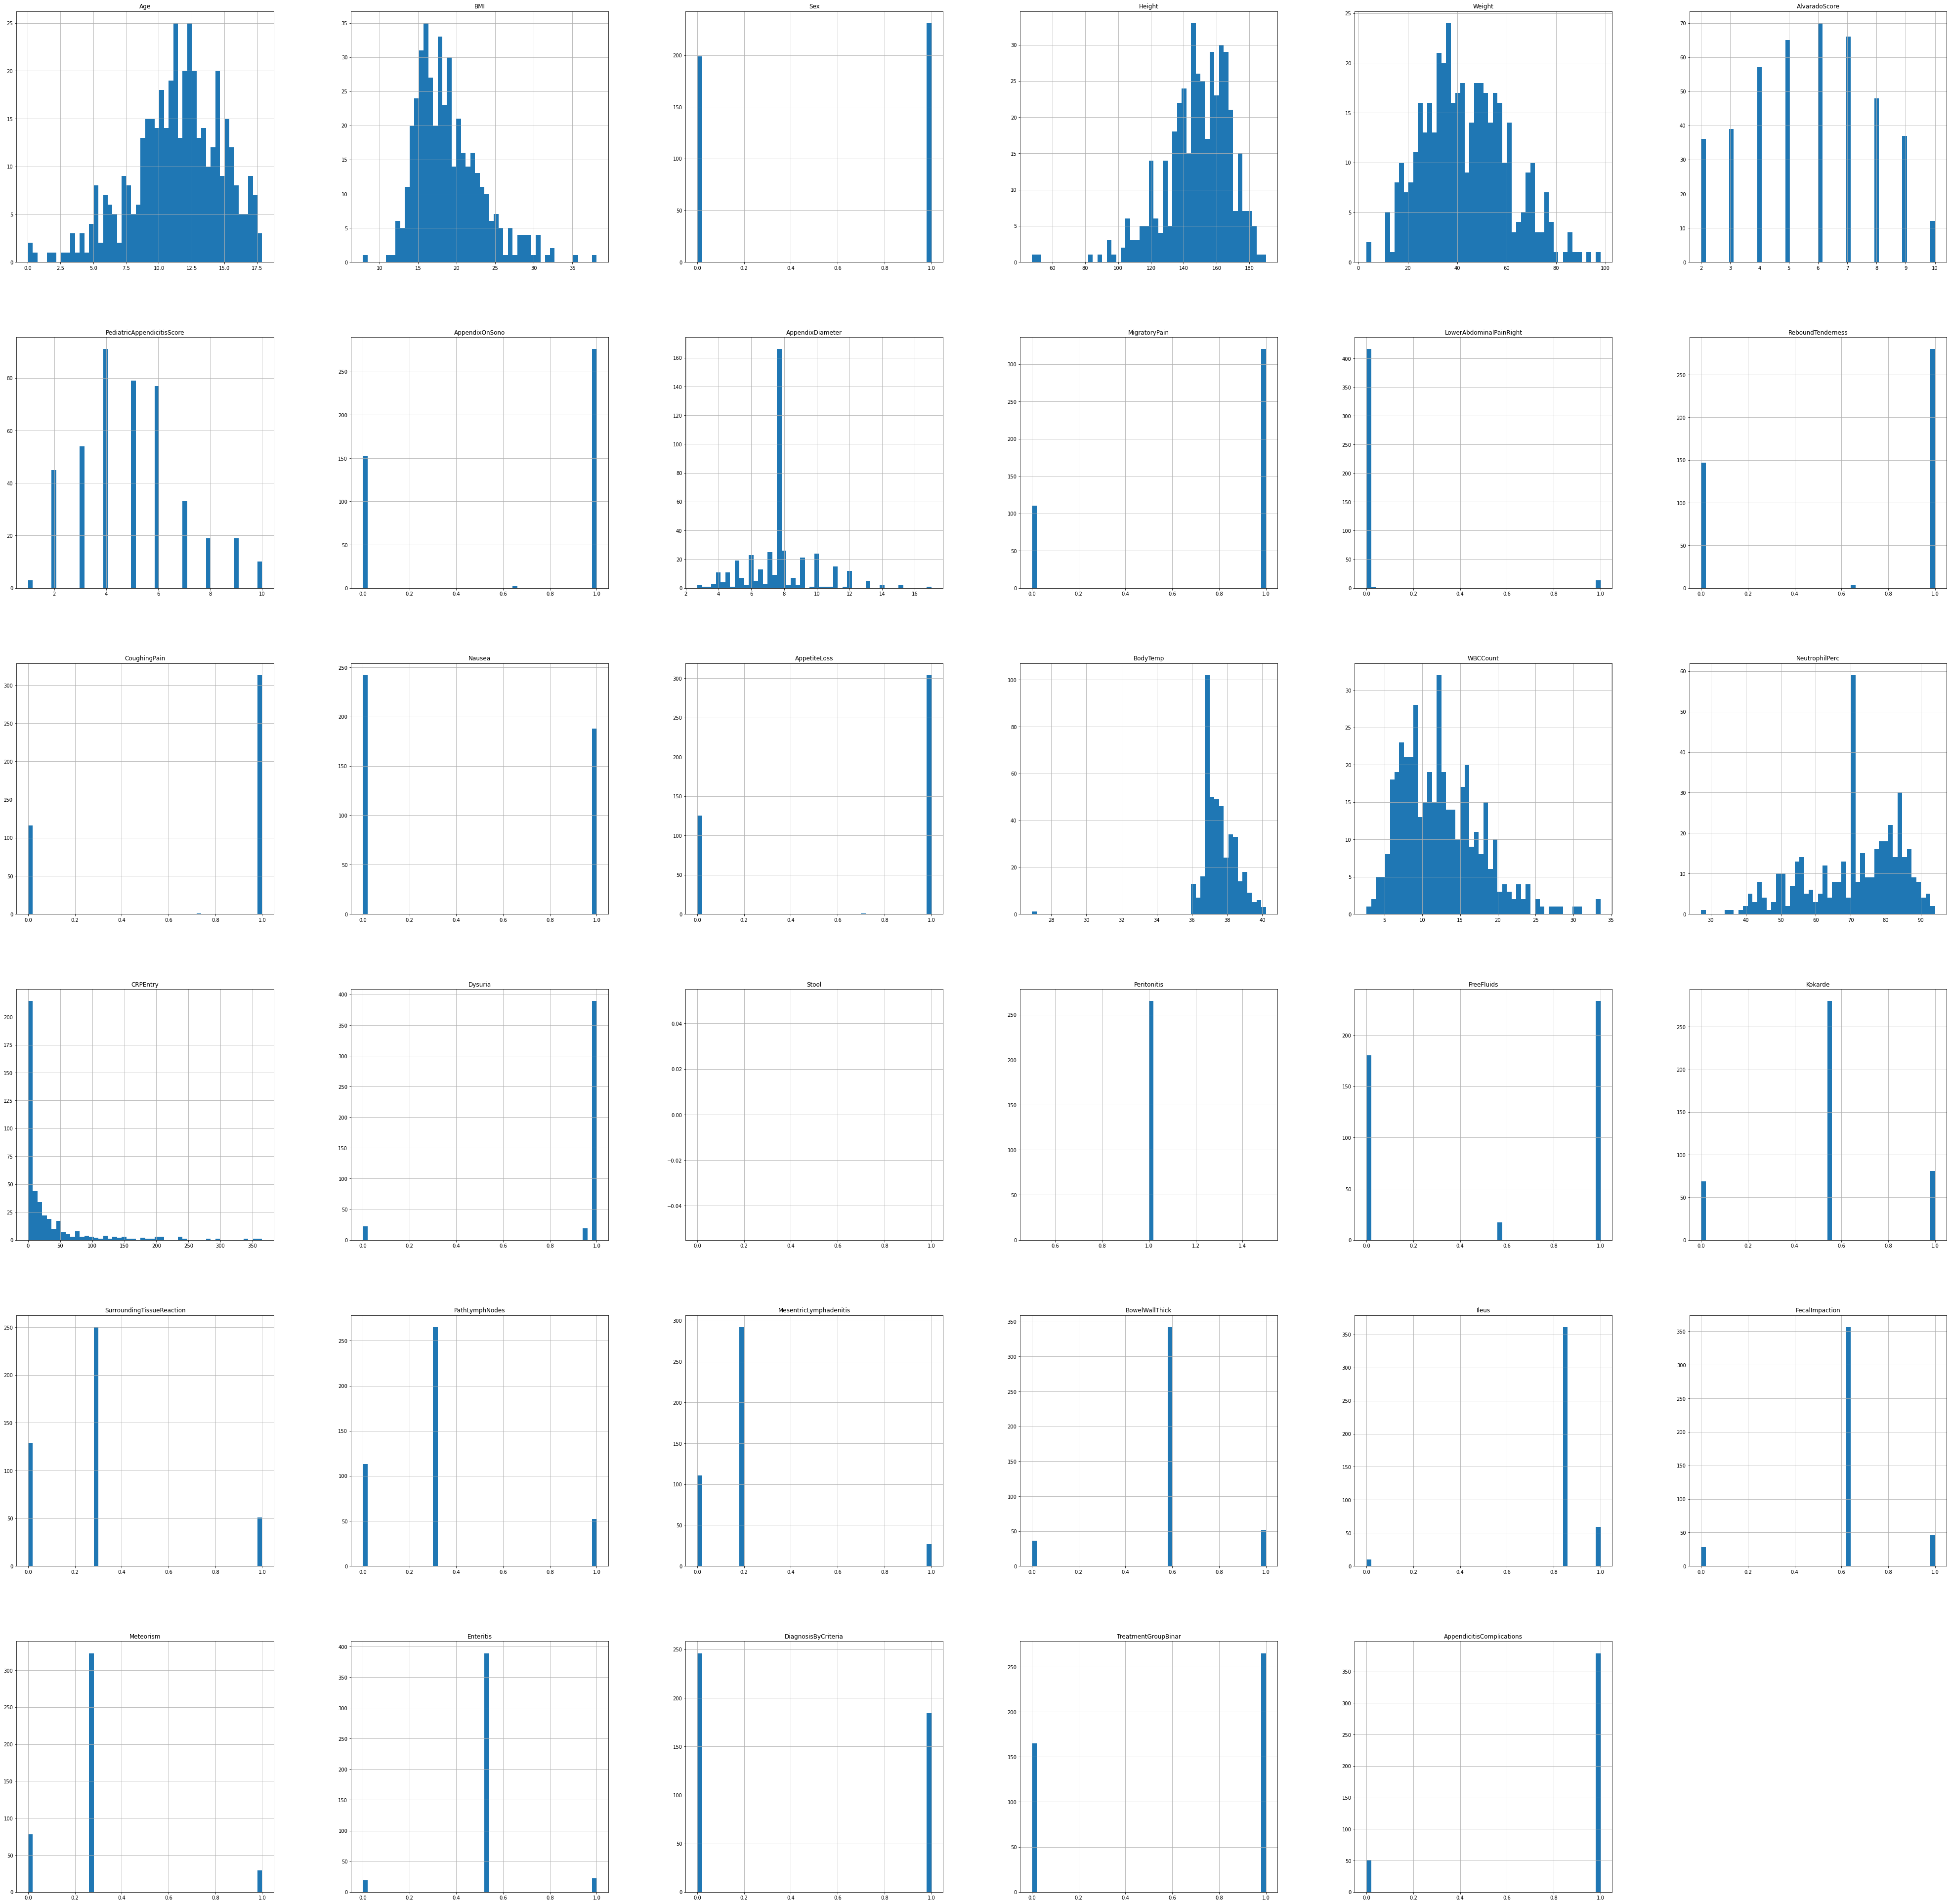

In [729]:
# Analyze the distribution of the data
df.hist(bins=50, figsize=(70,70))
plt.show()

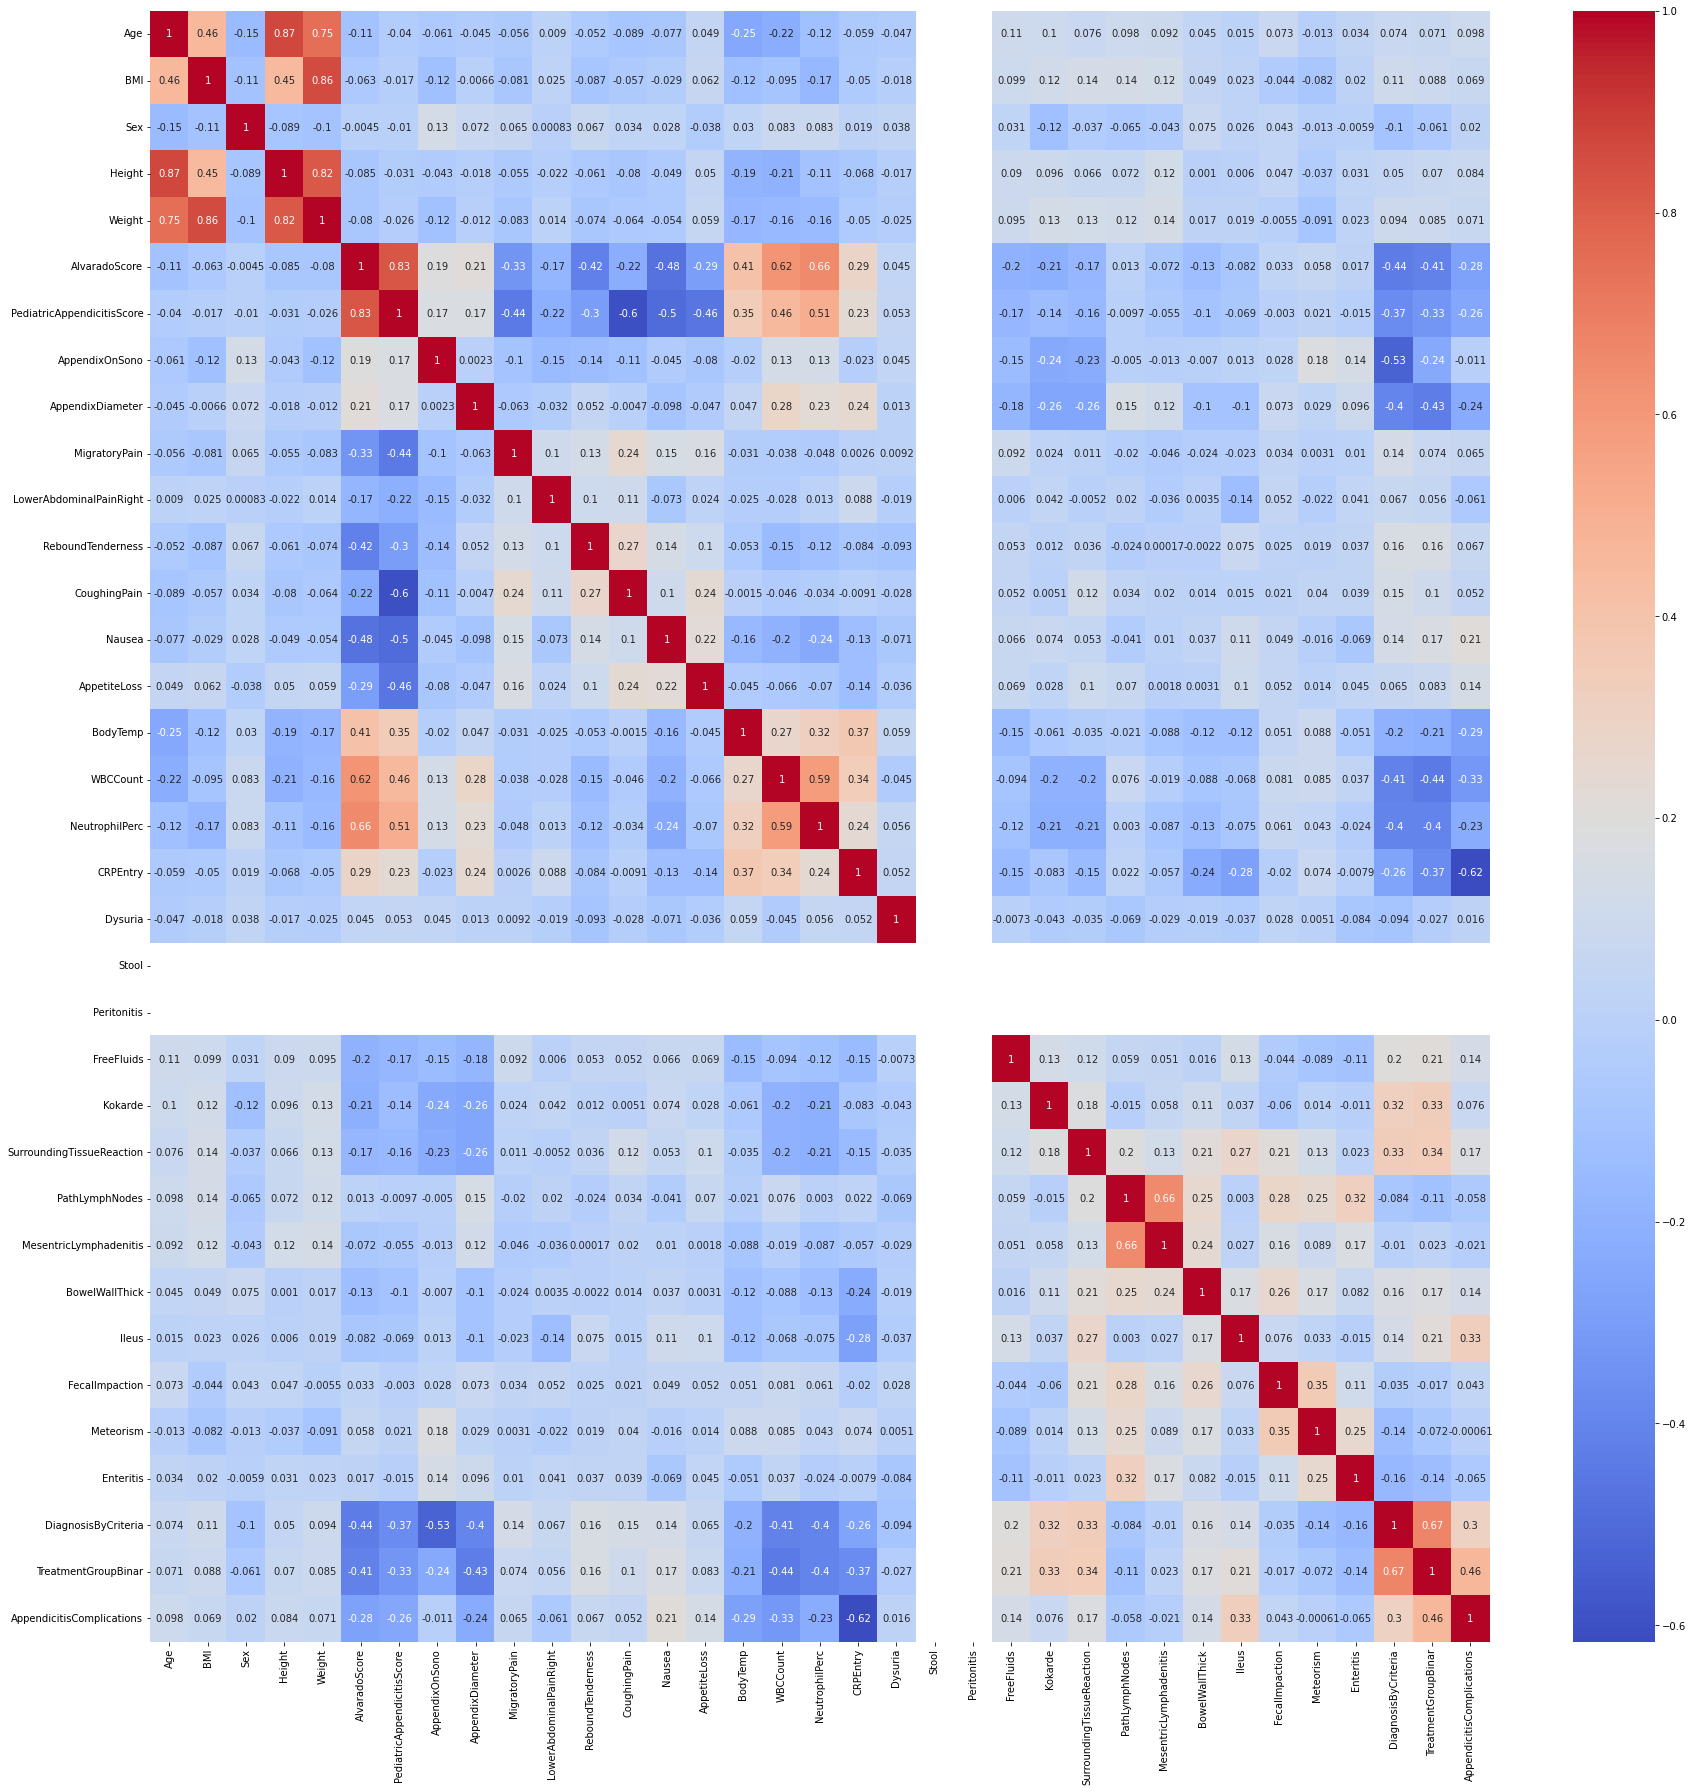

In [730]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##Logistic regression 

In [731]:
df

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,...,PathLymphNodes,MesentricLymphadenitis,BowelWallThick,Ileus,FecalImpaction,Meteorism,Enteritis,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1,1,1
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,...,0.315152,0.195652,0.590909,0.855072,0.621622,0.271028,0.536585,0,0,1
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,0.621622,0.271028,1.000000,1,1,1
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,...,1.000000,0.195652,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,1
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,...,0.000000,0.000000,1.000000,0.855072,0.621622,0.271028,0.536585,1,1,1
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,...,0.315152,0.195652,0.590909,0.855072,0.000000,0.271028,0.536585,1,1,1
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,...,1.000000,1.000000,0.590909,0.855072,0.621622,0.000000,0.536585,1,1,1
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,...,0.000000,0.000000,0.590909,1.000000,0.621622,0.000000,0.000000,1,1,1


In [732]:
X = df.iloc[:,0:17]
X

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,AppendixDiameter,MigratoryPain,LowerAbdominalPainRight,ReboundTenderness,CoughingPain,Nausea,AppetiteLoss,BodyTemp,WBCCount
0,12.531143,16.494601,1,159.0,41.7,7,5,1.0,5.500000,1,0.0,1.0,1.0,0,1.0,38.7,13.3
1,12.410678,12.595222,0,152.0,29.1,8,8,1.0,7.713158,1,0.0,0.0,0.0,0,1.0,38.8,14.9
2,10.537988,15.991247,1,133.5,28.5,3,3,1.0,6.000000,1,0.0,1.0,1.0,1,0.0,37.2,6.6
3,10.425736,16.185025,1,146.0,34.5,4,3,1.0,6.000000,1,0.0,1.0,1.0,1,1.0,37.0,12.4
4,13.270363,20.449137,0,164.0,55.0,2,2,1.0,6.500000,1,0.0,1.0,1.0,1,1.0,37.2,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,12.147844,22.292563,1,166.5,61.8,5,4,0.0,7.713158,1,0.0,1.0,1.0,1,1.0,38.4,10.3
426,12.528405,29.316297,1,152.3,68.0,7,7,0.0,7.713158,0,0.0,0.0,0.0,1,1.0,36.8,11.0
427,12.013689,28.906250,1,160.0,74.0,5,6,0.0,7.713158,0,0.0,0.0,0.0,0,1.0,37.0,7.5
428,7.739904,22.038188,0,120.5,32.0,5,3,0.0,7.713158,1,0.0,0.0,1.0,1,1.0,38.8,9.8


In [733]:
Y = df.iloc[:,33]
Y

0      1
1      0
2      1
3      1
4      1
      ..
425    1
426    1
427    1
428    1
429    1
Name: TreatmentGroupBinar, Length: 430, dtype: int64

In [734]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [735]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [736]:
print("Size of x_train", X_train.shape)
print("Size of y_train",y_train.shape)
print("Size of x_test",X_test.shape)
print("Size of y_test",y_test.shape)

Size of x_train (344, 17)
Size of y_train (344,)
Size of x_test (86, 17)
Size of y_test (86,)


In [737]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [738]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 0 0 0 0]


In [739]:
score = model.score(X_test, y_test)
print(score*100)

82.55813953488372


In [740]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


##Confusion Metrix

In [741]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27,  8],
       [ 7, 44]])

Text(0.5, 257.44, 'Predicted label ')

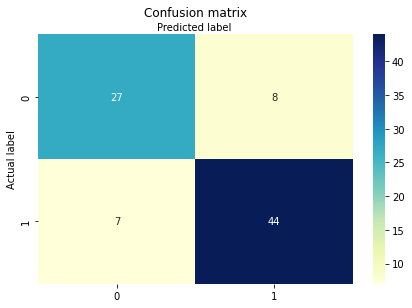

In [742]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label ')

In [743]:
def calculate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    f_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, accuracy, f_score

# Confusion matrix
confusion_matrix = cnf_matrix
precision, recall, accuracy, f_score = calculate_metrics(confusion_matrix)

In [744]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", f_score)

Accuracy:  0.8255813953488372
Precision:  0.7714285714285715
Recall:  0.7941176470588235
F-score:  0.782608695652174


In [745]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {f_score:.2f}")

Accuracy: 0.83
Precision: 0.77
Recall: 0.79
F-score: 0.78


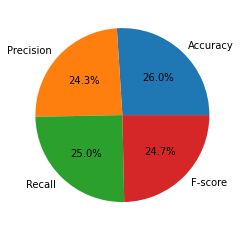

In [746]:
import matplotlib.pyplot as plt
# define the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f_score}
# create the pie chart
plt.pie(metrics.values(), labels=metrics.keys(), autopct='%1.1f%%')
plt.show()

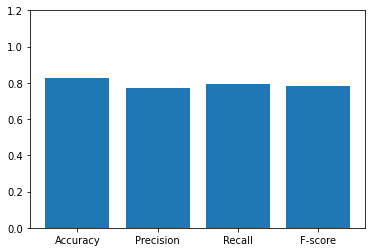

In [747]:
import matplotlib.pyplot as plt
# define the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f_score}

# create the bar chart
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1.2)
plt.show()

#Decision tree

In [748]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree_train(X_train, y_train):
    d_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 15, min_samples_leaf = 15)
    d_tree.fit(X_train, y_train)
    return d_tree

In [749]:
d_tree = decision_tree_train(X_train,y_train)

y_pred = d_tree.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [750]:
print("Size of x_train", X_train.shape)
print("Size of y_train",y_train.shape)
print("Size of x_test",X_test.shape)
print("Size of y_test",y_test.shape)

Size of x_train (344, 17)
Size of y_train (344,)
Size of x_test (86, 17)
Size of y_test (86,)


In [751]:
score = d_tree.score(X_test, y_test)
score*100

73.25581395348837

In [752]:
score = d_tree.score(X_test, y_test)
score*100

73.25581395348837

In [753]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[23, 12],
       [11, 40]])

In [754]:
def calculate_metrics(confusion_matrix):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    f_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, accuracy, f_score

# Confusion matrix
confusion_matrix = confusion
precision, recall, accuracy, f_score = calculate_metrics(confusion_matrix)

In [755]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-score: ", f_score)

Accuracy:  0.7325581395348837
Precision:  0.6571428571428571
Recall:  0.6764705882352942
F-score:  0.6666666666666666


In [756]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-score: {f_score:.2f}")

Accuracy: 0.73
Precision: 0.66
Recall: 0.68
F-score: 0.67


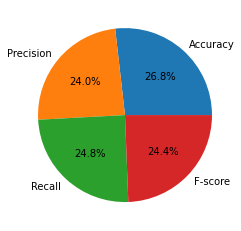

In [757]:
# import the library
import matplotlib.pyplot as plt

# define the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f_score}

# create the pie chart
plt.pie(metrics.values(), labels=metrics.keys(), autopct='%1.1f%%')
plt.show()

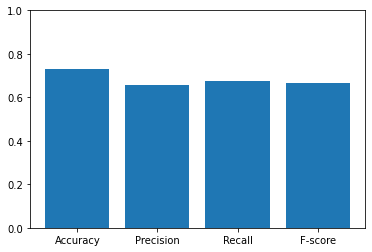

In [758]:
import matplotlib.pyplot as plt

# define the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F-score': f_score}

# create the bar chart
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1.0)
plt.show()

#Logistic_regression v Decission Tree

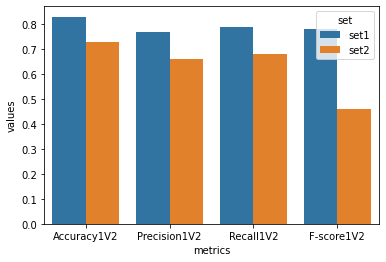

In [760]:
import seaborn as sns
import pandas as pd
#Logistic_regression values

accuracy1 = 0.83
precision1 = 0.77
recall1 = 0.79
f_score1 = 0.78
#Decission Tree values

accuracy2 = 0.73
precision2 = 0.66
recall2 = 0.68
f_score2 = 0.46

metrics = ['Accuracy1V2', 'Precision1V2', 'Recall1V2', 'F-score1V2']
values1 = [accuracy1, precision1, recall1, f_score1]
values2 = [accuracy2, precision2, recall2, f_score2]

data = {'metrics': metrics*2, 'values': values1+values2, 'set': ['set1']*4 + ['set2']*4}
df = pd.DataFrame(data)

sns.barplot(x='metrics', y='values', hue='set', data=df)
plt.show()